In [1]:
import numpy as np

epoch_flops = 76268.85 * 3 # GFLOPS
epochs = np.array([2000, 4000, 6000, 8000, 10000])
flops = epoch_flops * epochs
pf_days = flops * 10**9 / 8.64 / 10**19
pf_days

array([0.00529645, 0.0105929 , 0.01588934, 0.02118579, 0.02648224])

In [2]:
light_colors = [
    (236, 173, 165),  # light red
    (151, 209, 204),  # light blue
    (190, 198, 160),  # dark green
    (198, 164, 188),  # light purple
    (249, 218, 120),  # dark yellow
    (178, 178, 178),  # light gray
]
dark_colors = [
    (221, 97, 78),  # light red
    (60, 132, 123),  # light blue
    (100, 113, 55),  # dark green
    (142, 104, 183),  # light purple
    (244, 191, 68),  # dark yellow
    (178, 178, 178),  # light gray
]
light_colors = np.array(light_colors) / 256
dark_colors = np.array(dark_colors) / 256

colors = light_colors
# colors = ['#1f77b4','#ff7f0e','#2ca02c','#9467bd','#d62728', '#d67e27'] + sns.color_palette("tab10")

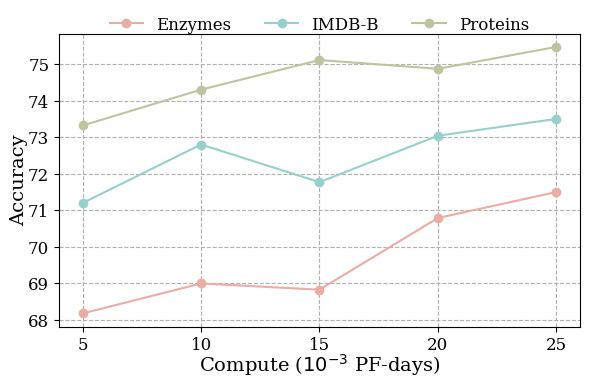

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.rc('font',family='serif')

# plt.rcParams.update({'mathtext.default':  'regular' })

compute = np.array([5, 10, 15, 20, 25])  # 10-3 * PF-days

# Sample data

accuracies = {
    "Enzymes": np.array([68.18, 69.00, 68.83, 70.79, 71.50]),
    "Proteins": np.array([73.32, 74.30, 75.11, 74.87, 75.47]),
    "IMDB-B": np.array([71.20, 72.80, 71.77, 73.04, 73.50]),
    # "IMDB-M": np.array([48.28, 48.60, 48.60, 49.47, 50.13]),
}
variances = {
    "Enzymes": np.array([6.21, 5.10, 5.88, 5.73, 5.85]),
    "Proteins": np.array([3.63, 5.33, 3.18, 5.30, 2.50]),
    "IMDB-B": np.array([2.90, 3.85, 2.38, 2.82, 2.48]),
    # "IMDB-M": np.array([2.75, 2.23, 2.48, 2.20, 2.05]),
}

keys_ordered = ['Enzymes', 'IMDB-B', 'Proteins']

# Create the plot
plt.figure(figsize=(6, 4))
for idx, dataset in enumerate(keys_ordered):
    acc = accuracies[dataset]
    plt.errorbar(compute, acc, marker='o', color=colors[idx], # yerr=variances[dataset], 
                 label=dataset, capsize=5)

# plt.xticks(epochs)
plt.xticks(compute)

plt.xlabel('Compute ($10^{-3}$ PF-days)', labelpad=-1, fontsize=14, fontfamily='serif')
plt.ylabel('Accuracy', labelpad=0, fontsize=14, fontfamily='serif')
# plt.title('Effects of pre-training epochs on graph classification')
# plt.legend(fontsize=14)
plt.legend(frameon=False, ncol=3, loc='upper center', bbox_to_anchor=(0.5, 1.11),  prop={'size': 12, 'family': 'serif'})
plt.grid(True, linestyle='--')

plt.xticks(compute, fontsize=12, fontfamily='serif')
plt.yticks(fontsize=12, fontfamily='serif')
# plt.show()
plt.tight_layout()
plt.savefig('compute_graph_class.pdf')

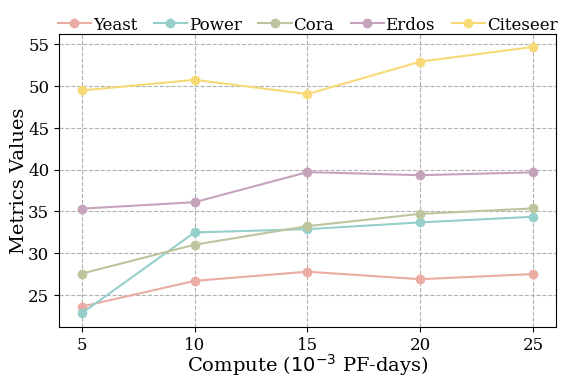

In [4]:
import matplotlib.pyplot as plt
import numpy as np

mpl.rc('font',family='serif')

# Epochs
compute = np.array([5, 10, 15, 20, 25])  # 10-3 * PF-days

# Metrics data extracted from your table
# MRR values
mrr_cora = np.array([27.56, 31.02, 33.24, 34.71, 35.36])
mrr_citeseer = np.array([49.45, 50.72, 49.02, 52.90, 54.66])

# Hits@10 values
hits10_power = np.array([22.81, 32.49, 32.88, 33.69, 34.36])
hits10_yeast = np.array([23.62, 26.70, 27.80, 26.90, 27.52])
hits10_erdos = np.array([35.33, 36.10, 39.70, 39.33, 39.67])

# Create plots
plt.figure(figsize=(6, 4))

# Plot MRR for Cora and Citeseer
# plt.plot(epochs, mrr_cora, marker='o', label='MRR on Cora')
# plt.plot(epochs, mrr_citeseer, marker='o', label='MRR on Citeseer')

# # Plot Hits@10 for Power, Yeast, and Erdos
# plt.plot(epochs, hits10_power, marker='o', label='Hits@10 on Power')
# plt.plot(epochs, hits10_yeast, marker='o', label='Hits@10 on Yeast')
# plt.plot(epochs, hits10_erdos, marker='o', label='Hits@10 on Erdos')

plt.plot(compute, hits10_yeast, marker='o', label='Yeast', color=colors[0])
plt.plot(compute, hits10_power, marker='o', label='Power', color=colors[1])
plt.plot(compute, mrr_cora, marker='o', label='Cora', color=colors[2])
plt.plot(compute, hits10_erdos, marker='o', label='Erdos', color=colors[3])
plt.plot(compute, mrr_citeseer, marker='o', label='Citeseer', color=colors[4])

# Adding titles and labels
# plt.title('Performance Metrics Across Epochs')
plt.xlabel('Compute ($10^{-3}$ PF-days)', labelpad=-1, fontsize=14, fontfamily='serif')
plt.ylabel('Metrics Values', labelpad=0, fontsize=14, fontfamily='serif')

# Adding grid
plt.grid(True, linestyle='--')

plt.xticks(compute, fontsize=12, fontfamily='serif')
plt.yticks(fontsize=12, fontfamily='serif')

# Adding legend
# plt.legend(loc='upper right', bbox_to_anchor=(1.01, 0.935), fontsize=11)
plt.legend(frameon=False, ncol=5, loc='upper center', bbox_to_anchor=(0.5, 1.11), 
           columnspacing=1., handletextpad=0.1,
           prop={'size': 12, 'family': 'serif'})
# plt.legend()
# Show plot
plt.tight_layout()
# plt.show()
plt.savefig('compute_link_pred.pdf')

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Data Setup
# methods = ['GIN', 'UniAug-SMALL', 'UniAug-FULL', 'UniAug-EXTRA']
# enzymes = [66.00, 66.83, 71.33, 71.17]
# proteins = [73.32, 73.50, 74.05, 75.47]
# imdb_b = [71.10, 69.80, 73.11, 73.50]
# # imdb_m = [49.07, 48.93, 49.67, 50.13]

# # Index for the groups
# index = np.arange(len(methods))

# # Bar width
# bar_width = 0.2

# # Plotting
# fig, ax = plt.subplots(figsize=(10, 6))
# rects1 = ax.bar(index, enzymes, bar_width, label='Enzymes')
# rects2 = ax.bar(index + bar_width, proteins, bar_width, label='Proteins')
# rects3 = ax.bar(index + 2 * bar_width, imdb_b, bar_width, label='IMDB-B')
# # rects4 = ax.bar(index + 3 * bar_width, imdb_m, bar_width, label='IMDB-M')

# # Add some text for labels, title and axes ticks
# ax.set_xlabel('Methods')
# ax.set_ylabel('Performance')
# ax.set_title('Performance by Method and Dataset')
# ax.set_xticks(index + 1.5 * bar_width)
# ax.set_xticklabels(methods)

# plt.ylim(bottom=60, top=80)
# ax.legend()

# # Turn on the grid for better readability
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# plt.show()


In [6]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Data Setup without GIN
# # methods = ['UniAug-SMALL', 'UniAug-FULL', 'UniAug-EXTRA']
# methods = ['SMALL', 'FULL', 'EXTRA']
# enzymes = [66.83, 71.33, 71.17]
# proteins = [73.50, 74.05, 75.47]
# imdb_b = [69.80, 73.11, 73.50]
# imdb_m = [48.93, 49.67, 50.13]

# # Index for the groups
# index = np.arange(len(methods))

# # Bar width
# bar_width = 0.2

# # Plotting
# fig, ax = plt.subplots(figsize=(10, 6))
# bar_positions = [index, index + bar_width, index + 2 * bar_width] #, index + 3 * bar_width]
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# # Plot bars and lines
# for i, (data, color) in enumerate(zip([enzymes, proteins, imdb_b], colors)):
#     bar_pos = bar_positions[i]
#     rects = ax.bar(bar_pos, data, bar_width, color=color, label=f'{["Enzymes", "Proteins", "IMDB-B", "IMDB-M"][i]}')
#     # Draw lines with the same color as bars and markers at the middle top of each bar
#     # ax.plot(bar_pos + 0.5 * bar_width, data, marker='o', linestyle='-', color=color)
#     ax.plot(bar_pos + 0.0 * bar_width, [x - 0. for x in data], marker='o', 
#             markerfacecolor=color, markeredgecolor=color,
#             linestyle='--', color='darkgray')

# # Add some text for labels, title, and axes ticks
# ax.set_xlabel('Pre-training data scale')
# ax.set_ylabel('Accuracy')
# # ax.set_title('Performance by Method and Dataset')
# ax.set_xticks(index + 1. * bar_width)
# ax.set_xticklabels(methods)

# plt.ylim(bottom=60, top=80)
# ax.legend()

# # Turn on the grid for better readability
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# plt.show()


In [7]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Data Setup without GCN
# methods = ['UniAug-SMALL', 'UniAug-FULL', 'UniAug-EXTRA']
# cora_mrr = [32.25, 32.81, 35.36]
# citeseer_mrr = [47.91, 48.32, 54.66]
# power_hits = [32.25, 32.97, 34.36]
# yeast_hits = [25.81, 26.36, 27.52]
# erdos_hits = [36.28, 36.07, 39.67]

# # Index for the groups
# index = np.arange(len(methods))

# # Bar width
# bar_width = 0.15

# # Plotting
# fig, ax = plt.subplots(figsize=(12, 8))
# # colors = ['blue', 'green', 'red', 'purple', 'orange']  # Colors for each dataset
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# bar_positions = [index, index + bar_width, index + 2 * bar_width, index + 3 * bar_width, index + 4 * bar_width]

# # Plot bars and lines
# datasets = [cora_mrr, citeseer_mrr, power_hits, yeast_hits, erdos_hits]
# labels = ['Cora MRR', 'Citeseer MRR', 'Power Hits@10', 'Yeast Hits@10', 'Erdos Hits@10']

# for i, (data, label) in enumerate(zip(datasets, labels)):
#     bar_pos = bar_positions[i]
#     rects = ax.bar(bar_pos, data, bar_width, color=colors[i], label=label)
#     # Draw lines with the same color as bars and markers at the middle top of each bar
#     ax.plot(bar_pos + 0. * bar_width, data, marker='o', linestyle='-', color=colors[i])

# # Add some text for labels, title, and axes ticks
# ax.set_xlabel('Methods')
# ax.set_ylabel('Performance')
# ax.set_title('Performance by Method and Dataset')
# ax.set_xticks(index + 2 * bar_width)
# ax.set_xticklabels(methods)

# plt.ylim(bottom=20, top=60)

# ax.legend()

# # Turn on the grid for better readability
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# plt.show()


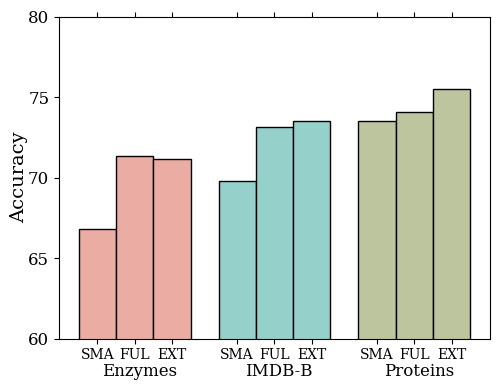

In [8]:
import seaborn as sns
import matplotlib.ticker as ticker

mpl.rc('font',family='serif')

bottom = 60 
top = 80

mean_dict = {
    "Enzymes": np.array([66.83, 71.33, 71.17]),
    "Proteins": np.array([73.50, 74.05, 75.47]),
    "IMDB-B": np.array([69.80, 73.11, 73.50]),
    # "IMDB-M": np.array([49.07, 48.93, 49.67, 50.13])
}

num_dataset = len(mean_dict)
num_group = len(mean_dict[sorted(mean_dict)[0]])
# fig, ax = plt.subplots(figsize=(4 * num_dataset + 1 , 9))
fig, ax = plt.subplots(figsize=(1.7 * num_dataset, 4))

# interval_range = num_dataset
bar_width = 0.8 / num_group

x = bar_width * np.arange(num_group) # + 0.1

keys_ordered = ['Enzymes', 'IMDB-B', 'Proteins']

# colors = ['#1f77b4','#ff7f0e','#2ca02c','#9467bd','#d62728', '#d67e27'] + sns.color_palette("tab10")
x_ticks_outer = np.arange(num_dataset) + 0.3
x_ticks_outer_name = keys_ordered  # list(mean_dict.keys())
x_ticks_outer_name = ["\n"+name for name in x_ticks_outer_name]

x_ticks_inner_unit = np.arange(num_group) * bar_width 
# x_ticks_inner_unit_name = [str(i) for i in range(1, num_group + 1)]
x_ticks_inner_unit_name = ['SMA', 'FUL', 'EXT']

x_ticks_inner = []
x_ticks_inner_name = []
for i in range(num_dataset):
    x_ticks_inner.append(i + x_ticks_inner_unit)
    x_ticks_inner_name += x_ticks_inner_unit_name

x_ticks_inner = np.concatenate(x_ticks_inner, axis=0)

# x_ticks = [i * interval_range for i in range(num_interval + 1)]
# x_ticks = [f"{x_tick:.1f}" for x_tick in x_ticks]
# import ipdb; ipdb.set_trace()

for idx, key in enumerate(keys_ordered):
    # [num_group (mean), num_group (std)]
    # record = records[key]
    # mean, variance = record[0], record[1]
    mean = mean_dict[key]
    ax.bar(x + idx, mean, bar_width, # yerr=variance, 
           color=colors[idx], label=key, capsize=2, edgecolor ='black') # ,marker=markers[i]

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.axhline(y=0, color='black', linewidth=2.0)
ax.grid(False) # ,loc=(0.02, 0.6)
plt.ylabel('Accuracy', fontsize=14, labelpad=0, fontfamily='serif') # , color='blue', backgroundcolor='yellow'
# plt.xlabel(f"{arg_dict['name']}", fontsize=26,  fontfamily='serif') # fontweight='bold',

# final_x_ticks = []
# for i in range(len(x_ticks) - 1):
#     final_x_ticks.append(f"{x_ticks[i]}-{x_ticks[i+1]}")
ax.set_xticks(x_ticks_inner, x_ticks_inner_name, fontsize=10, fontfamily='serif')
plt.yticks(np.arange(bottom, top + 1, 5.0), fontsize=12, fontfamily='serif')
ax.set_xticks(x_ticks_outer, x_ticks_outer_name, fontsize=12, fontfamily='serif', minor=True) # 

# ax2 = ax.secondary_xaxis('bottom')
# ax2 = ax.twiny()
# ax.axhline(y=-0.5, color='black', linewidth=2.0)

# Set the minor xticks
# ax2.tick_params(axis='x', which='both', labelbottom=True) # length=1, pad=1
# ax2.tick_params(bottom=False)
# ax.grid(which='minor', alpha=0.2)
# plt.xticks(x, final_x_ticks, fontsize=12, fontfamily='serif', rotation=45, ha='right')
ax.tick_params(axis='x', which='minor', direction='out', bottom='off', length=0)
ax.tick_params(axis='x', which='major', bottom='off', top='off' )


plt.ylim(bottom=bottom, top=top)

plt.tight_layout()

# plt.show()
plt.savefig('data_graph_class.pdf')

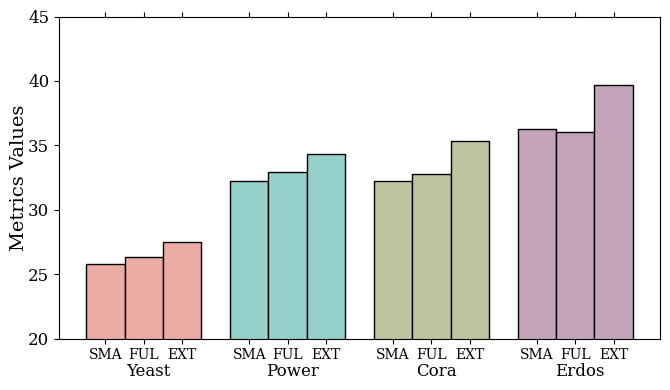

In [9]:
import seaborn as sns
import matplotlib.ticker as ticker

mpl.rc('font',family='serif')

bottom = 20 
top = 45

mean_dict = {
    "Cora": np.array([32.25, 32.81, 35.36]),
    # "Citeseer": np.array([47.91, 48.32, 54.66]),
    "Power": np.array([32.25, 32.97, 34.36]),
    "Yeast": np.array([25.81, 26.36, 27.52]),
    "Erdos": np.array([36.28, 36.07, 39.67])
}

num_dataset = len(mean_dict)
num_group = len(mean_dict[sorted(mean_dict)[0]])
# fig, ax = plt.subplots(figsize=(4 * num_dataset + 1 , 9))
fig, ax = plt.subplots(figsize=(1.7 * num_dataset, 4))

# interval_range = num_dataset
bar_width = 0.8 / num_group

x = bar_width * np.arange(num_group) # + 0.1

# keys_ordered = ['Yeast', 'Power', 'Cora', 'Erdos', 'Citeseer']
keys_ordered = ['Yeast', 'Power', 'Cora', 'Erdos'] #, 'Citeseer']

# colors = ['#1f77b4','#ff7f0e','#2ca02c','#9467bd','#d62728', '#d67e27'] + sns.color_palette("tab10")
x_ticks_outer = np.arange(num_dataset) + 0.3
x_ticks_outer_name = keys_ordered  # list(mean_dict.keys())
x_ticks_outer_name = ["\n"+name for name in x_ticks_outer_name]

x_ticks_inner_unit = np.arange(num_group) * bar_width 
# x_ticks_inner_unit_name = [str(i) for i in range(1, num_group + 1)]
x_ticks_inner_unit_name = ['SMA', 'FUL', 'EXT']

x_ticks_inner = []
x_ticks_inner_name = []
for i in range(num_dataset):
    x_ticks_inner.append(i + x_ticks_inner_unit)
    x_ticks_inner_name += x_ticks_inner_unit_name

x_ticks_inner = np.concatenate(x_ticks_inner, axis=0)

# x_ticks = [i * interval_range for i in range(num_interval + 1)]
# x_ticks = [f"{x_tick:.1f}" for x_tick in x_ticks]
# import ipdb; ipdb.set_trace()

for idx, key in enumerate(keys_ordered):
    # [num_group (mean), num_group (std)]
    # record = records[key]
    # mean, variance = record[0], record[1]
    mean = mean_dict[key]
    ax.bar(x + idx, mean, bar_width, # yerr=variance, 
           color=colors[idx], label=key, capsize=2, edgecolor ='black') # ,marker=markers[i]

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.axhline(y=0, color='black', linewidth=2.0)
ax.grid(False) # ,loc=(0.02, 0.6)
plt.ylabel('Metrics Values', fontsize=14, labelpad=0, fontfamily='serif') # , color='blue', backgroundcolor='yellow'
# plt.xlabel(f"{arg_dict['name']}", fontsize=26,  fontfamily='serif') # fontweight='bold',

# final_x_ticks = []
# for i in range(len(x_ticks) - 1):
#     final_x_ticks.append(f"{x_ticks[i]}-{x_ticks[i+1]}")
ax.set_xticks(x_ticks_inner, x_ticks_inner_name, fontsize=10, fontfamily='serif')
plt.yticks(np.arange(bottom, top + 1, 5.0), fontsize=12, fontfamily='serif')
ax.set_xticks(x_ticks_outer, x_ticks_outer_name, fontsize=12, fontfamily='serif', minor=True) # 

# ax2 = ax.secondary_xaxis('bottom')
# ax2 = ax.twiny()
# ax.axhline(y=-0.5, color='black', linewidth=2.0)

# Set the minor xticks
# ax2.tick_params(axis='x', which='both', labelbottom=True) # length=1, pad=1
# ax2.tick_params(bottom=False)
# ax.grid(which='minor', alpha=0.2)
# plt.xticks(x, final_x_ticks, fontsize=12, fontfamily='serif', rotation=45, ha='right')
ax.tick_params(axis='x', which='minor', direction='out', bottom='off', length=0)
ax.tick_params(axis='x', which='major', bottom='off', top='off' )

plt.ylim(bottom=bottom, top=top)

plt.tight_layout()

# plt.show()
plt.savefig('data_link_pred.pdf')